<a href="https://colab.research.google.com/github/KrishT97/Practica_Redes_Neuronales/blob/main/Pr%C3%A1ctica_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2: Clasificación Señales de Tráfico**
### *Krish Sadhwani Mansukhani, Jan Provazník*

Las señales de tráfico son de gran necesidad en cuanto a la regulación del tráfico y su buen funcionamiento.

De lo cuál, se consideraría imprescindible que los vehículos de nueva generación basados en la **Inteligencia Artificial**, puedan captar y clasificar por si solas, las señales de tráfico. 
Para ello, esta práctica tiene como objetivo entrenar una red neuronal convolucional que pudiera cumplir con esta misma funcionalidad.

Al efecto, el dataset a implementar será el de "**Traffic Signs Classification**" del usuario *flo2607* en Kaggle. Contiene 43 clases de señales y ~ 50,000 imagenes en total. Para esta práctica, se cogerá un subset del dataset, que mejorará el rendimiento substancialmente del entrenamiento, se tendrá 30 clases con ~ 30,000 imagenes.


Para la ejecución del programa, se cargarán primero las librerías que hagan falta para el entrenamiento del modelo. En vez de estar importando las imágenes cada vez que se inicie sesión en el notebook del Colab, se predefinirá un lugar en el Drive con `mount()` donde se pueda acceder a las imágenes:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib.pyplot import imshow
from PIL import Image
import tensorflow.keras
from time import time
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A continuación, se define una sola dimensión para todas las imágenes 32x32 (visualizando uno como ejemplo) y los lotes por coger para cada epoch dentro del dataset, estos se usarán para el conjunto de **entrenamiento** y **validación** *(utilizado para medir el nivel de precisión logrado en el modelo)* con una referencia de proporción (80:20):

Found 29399 files belonging to 30 classes.
Using 23520 files for training.
Found 29399 files belonging to 30 classes.
Using 5879 files for validation.
(150, 150, 3)


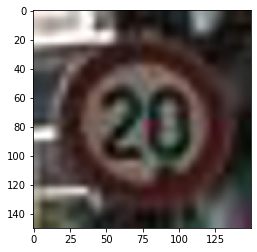

In [ ]:
image_size = (32, 32)
batch_size = 64

train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/street_signs",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/street_signs",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

pil_im = Image.open('/content/drive/My Drive/street_signs/0/00001_00029.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Lo siguiente será generar el módelo a base de capas convolutivas, la última contendrá el numero de salidas (*30 en este caso*), el optimizer de Keras a usar para este modelo será el de `Adam()`, y se utlizará la función de `EarlyStopping()` que hará detectar la parada del entrenamiento a partir de una serie de epochs cuando crea irredimible seguir:

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)


history = model.fit(
        train_ds,
        epochs= 50,
        validation_data = val_ds,
        callbacks = [es]
)


Epoch 1/50
368/368 [==============================] - 3430s 9s/step - loss: 3.8676 - accuracy: 0.1437 - val_loss: 2.5173 - val_accuracy: 0.2756
Epoch 2/50
368/368 [==============================] - 50s 135ms/step - loss: 2.2836 - accuracy: 0.3432 - val_loss: 1.4429 - val_accuracy: 0.5911
Epoch 3/50
368/368 [==============================] - 49s 133ms/step - loss: 1.5330 - accuracy: 0.5468 - val_loss: 0.6727 - val_accuracy: 0.8129
Epoch 4/50
368/368 [==============================] - 49s 133ms/step - loss: 0.9204 - accuracy: 0.7286 - val_loss: 0.2912 - val_accuracy: 0.9388
Epoch 5/50
368/368 [==============================] - 49s 132ms/step - loss: 0.5867 - accuracy: 0.8281 - val_loss: 0.1524 - val_accuracy: 0.9728
Epoch 6/50
368/368 [==============================] - 49s 132ms/step - loss: 0.4053 - accuracy: 0.8832 - val_loss: 0.1266 - val_accuracy: 0.9735
Epoch 7/50
368/368 [==============================] - 49s 132ms/step - loss: 0.3056 - accuracy: 0.9128 - val_loss: 0.0687 - val_acc

Una vez ejecutado el modelo, se determina que el entrenamiento ha llegado a ser exitoso, es decir, que se ha adquirir un buen nivel de "accuracy". Para representarlo gráficamente, se haría el uso de `pyplot` desde la librería de **Matplotlib**. Se define cada parametro a representar dentro de la gráfica y se visualiza mediante un "*line chart*":

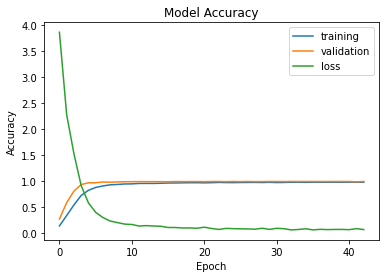

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

Se intuye a partir de la gráfica, que la validación sigue el mismo patrón que el de entrenamiento. Otro aspecto a considerar es que no esta dado por siempre que cada iteración de epoch sea mejor que el anterior, puede variar. En este caso, aunque no se admira bien en la gráfica, la iteracion epoch 33 ha devuelto la mayor precisión; *0.9986*.

El modelo "loss" o perdida refleja la penalidad por haber tenido una mala predición. Se entiende entonces, que al principio ha llegado a tener un valor muy alto que, con cada iteración de epoch, ha bajado hasta quedarse relativamente constante.

Se importarían las librerías para reflejar los resultados del modelo mediante una **matriz de confusión**:  

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        84
           1     1.0000    1.0000    1.0000       171
           2     1.0000    1.0000    1.0000       136
           3     0.9949    1.0000    0.9974       195
           4     1.0000    1.0000    1.0000        92
           5     0.9982    0.9964    0.9973       553
           6     0.9956    1.0000    0.9978       227
           7     1.0000    0.9885    0.9942        87
           8     1.0000    1.0000    1.0000       196
           9     1.0000    1.0000    1.0000       111
          10     0.9828    1.0000    0.9913       171
          11     1.0000    1.0000    1.0000       288
          12     1.0000    0.9960    0.9980       496
          13     1.0000    1.0000    1.0000       104
          14     0.9958    1.0000    0.9979       235
          15     1.0000    1.0000    1.0000       165
          16     0.9979    0.9979    0.9979       474
          17     1.0000    

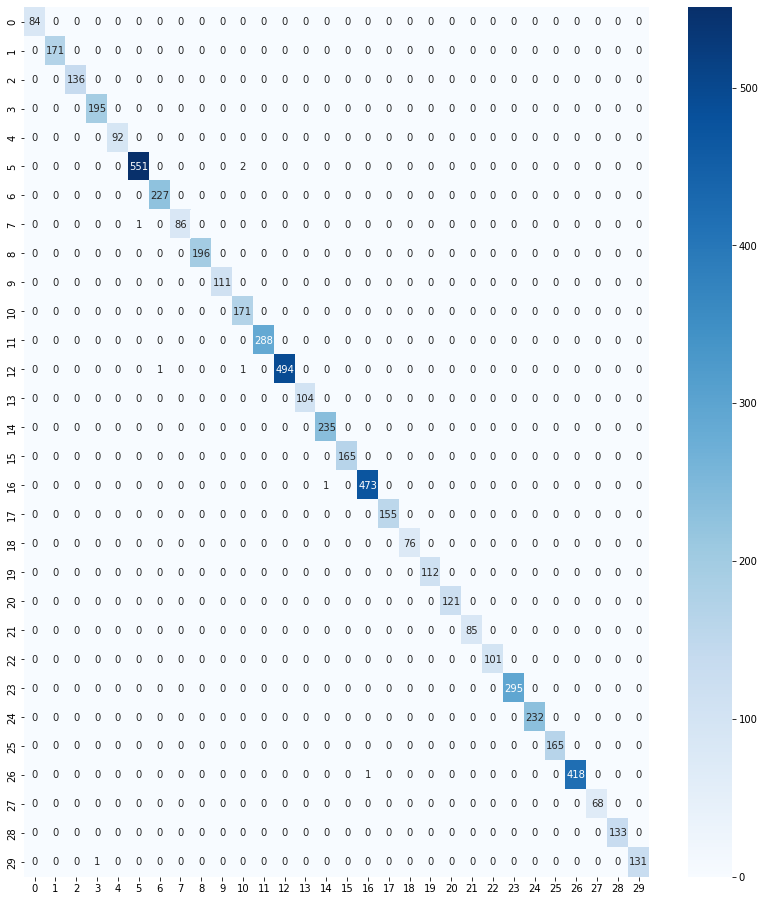

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

plt.figure(figsize=(14, 16))

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

Los valores de la diagonal principal se corresponden con los estimados de forma correcta por el modelo. A partir de la tabla de valores, se identifica **Alto Precisión y Alto Recall** dado el **F1-Score**, por lo cuál se puede comentar que el entrenamiento ha manejado perfectamente las clases a escoger y concluir que el modelo es **altamente confiable**. 